In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
df = pd.read_csv('../data/grouped_data.csv')

In [3]:
df.head(5)

,gene_id,transcript_id,sevenmers,order_1,order_2,order_3,order_6,order_7,transcript_position,label,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,ATAACTC,A,T,A,T,C,0.027180,0.0,...,0.071960,0.904564,0.495125,0.911232,0.049443,0.000000,0.4,0.333333,0.00,0.50
1,ENSG00000000003,ENST00000373020,TAAACAA,T,A,A,A,A,0.036632,0.0,...,0.189154,0.879668,0.510293,0.851449,0.120152,0.277865,0.8,0.000000,0.00,0.25
2,ENSG00000000003,ENST00000373020,ATAACAA,A,T,A,A,A,0.043787,0.0,...,0.079800,0.917012,0.554713,0.914855,0.106028,0.488226,0.8,0.000000,0.00,0.25
3,ENSG00000000003,ENST00000373020,ATAACCA,A,T,A,C,A,0.044161,0.0,...,0.215764,0.792531,0.461538,0.773551,0.085492,0.499215,0.6,0.333333,0.00,0.25
4,ENSG00000000003,ENST00000373020,GTAACCC,G,T,A,C,C,0.045175,0.0,...,0.142325,0.890733,0.488624,0.867754,0.074317,0.529042,0.2,0.666667,0.25,0.25


In [4]:
len(df['sevenmers'].unique())

288

In [5]:
df.shape

(121838, 75)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gene_id                      121838 non-null  object 
 1   transcript_id                121838 non-null  object 
 2   sevenmers                    121838 non-null  object 
 3   order_1                      121838 non-null  object 
 4   order_2                      121838 non-null  object 
 5   order_3                      121838 non-null  object 
 6   order_6                      121838 non-null  object 
 7   order_7                      121838 non-null  object 
 8   transcript_position          121838 non-null  float64
 9   label                        121838 non-null  float64
 10  dwelling_time_1_min          121838 non-null  float64
 11  dwelling_time_1_max          121838 non-null  float64
 12  dwelling_time_1_median       121838 non-null  float64
 13 

In [7]:
df.describe()

,transcript_position,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,sd_current_1_median,sd_current_1_std,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121712.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,0.086125,0.044937,0.079236,0.178426,0.275855,0.220600,0.204424,0.037832,0.278504,0.038916,...,0.223717,0.600719,0.353799,0.558398,0.137053,0.504892,0.361193,0.232336,0.342650,0.281608
std,0.074499,0.207166,0.057796,0.086127,0.109779,0.084702,0.107993,0.024392,0.197611,0.022602,...,0.085140,0.209141,0.153923,0.270714,0.048208,0.307384,0.228732,0.254633,0.232637,0.232806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035777,0.000000,0.040097,0.116822,0.195538,0.159748,0.127335,0.022428,0.130923,0.021054,...,0.163034,0.410788,0.218852,0.307971,0.102507,0.240455,0.200000,0.000000,0.250000,0.000000
50%,0.066909,0.000000,0.080194,0.163305,0.252953,0.207715,0.180187,0.037070,0.212506,0.036958,...,0.217155,0.531120,0.335861,0.448370,0.132427,0.505480,0.400000,0.333333,0.250000,0.250000
75%,0.114060,0.000000,0.080194,0.222066,0.332677,0.267810,0.255162,0.050487,0.384465,0.053706,...,0.272945,0.806362,0.497291,0.833333,0.166588,0.772349,0.600000,0.333333,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Get non-numerical features.
non_num_cols = list(set(df.columns) - set(df.describe().columns))
print('Non-numerical features: ', non_num_cols)

Non-numerical features:  ['order_2', 'order_1', 'order_7', 'sevenmers', 'transcript_id', 'gene_id', 'order_3', 'order_6']


In [9]:
#Assign appropriate data type to categorical variables.
df[non_num_cols] = df[non_num_cols].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   gene_id                      121838 non-null  category
 1   transcript_id                121838 non-null  category
 2   sevenmers                    121838 non-null  category
 3   order_1                      121838 non-null  category
 4   order_2                      121838 non-null  category
 5   order_3                      121838 non-null  category
 6   order_6                      121838 non-null  category
 7   order_7                      121838 non-null  category
 8   transcript_position          121838 non-null  float64 
 9   label                        121838 non-null  float64 
 10  dwelling_time_1_min          121838 non-null  float64 
 11  dwelling_time_1_max          121838 non-null  float64 
 12  dwelling_time_1_median       121838 non-null

# Train-test split

In [11]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42)
split = splitter.split(df, groups = df['gene_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [12]:
y_train = train['label']
X_train = train.drop(['label', 'sevenmers'], axis = 1)

y_test = test['label']
X_test = test.drop(['label', 'sevenmers'], axis = 1)

In [13]:
train_geneids = train['gene_id'].unique()
test_geneids = test['gene_id'].unique()

In [14]:
# check if any gene id in train set is present in test set
np.in1d(train_geneids, test_geneids).any()

False

# Drop gene_id and transcript_id columns

In [15]:
X_train_ids = X_train[['gene_id', 'transcript_id']]
X_train_clean = X_train.drop(columns=['gene_id', 'transcript_id'])

In [16]:
X_train_ids.shape

(98006, 2)

In [17]:
X_train_clean.shape

(98006, 71)

In [18]:
X_test_ids = X_test[['gene_id', 'transcript_id']]
X_test_clean = X_test.drop(columns=['gene_id', 'transcript_id'])

# Oversampling on train data

In [19]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 93715, 1.0: 4291})


<AxesSubplot:>

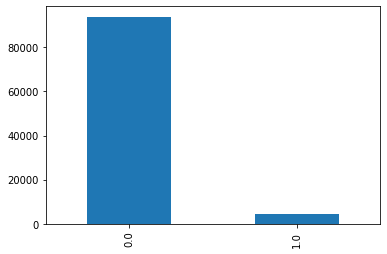

In [20]:
y_train.value_counts().plot(kind="bar")

In [21]:
y_train.value_counts()/len(y_train)

0.0    0.956217
1.0    0.043783
Name: label, dtype: float64

95.6% of training data consists of data with no m6a modification. Class imbalance!

In [22]:
# create list with categorical features' names
nonum_cols_names = ['order_1', 'order_2', 'order_3', 'order_4', 'order_5', 'order_6', 'order_7']

# # create list with numerical features' names
# num_cols_names = ['dwelling_time_min', 'dwelling_time_max', 'dwelling_time_mean', 'dwelling_time_median', 'dwelling_time_std', 
#                   'dwelling_time_skew', 'sd_current_min', 'sd_current_max', 'sd_current_mean', 'sd_current_median', 'sd_current_std',
#                   'sd_current_skew', 'mean_current_min', 'mean_current_max', 'mean_current_mean', 'mean_current_median', 'mean_current_std',
#                   'mean_current_skew', 'count_A', 'count_C', 'count_G', 'count_T']

In [23]:
cat_col_index = [df.columns.get_loc(c) for c in nonum_cols_names if c in df]

In [24]:
X_train_clean.head(5)

,order_1,order_2,order_3,order_6,order_7,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T
13,A,G,A,A,A,0.005447,0.201701,0.200140,0.472441,0.308882,...,0.166513,0.869986,0.483207,0.879529,0.060948,0.000000,0.8,0.000000,0.25,0.00
14,A,G,A,C,T,0.007689,0.061968,0.142256,0.325787,0.230354,...,0.155642,0.778700,0.458288,0.798007,0.113437,0.041257,0.4,0.333333,0.25,0.25
15,G,G,A,A,A,0.012762,0.151883,0.135239,0.183727,0.169832,...,0.282988,0.876902,0.498375,0.874094,0.081961,0.134578,0.6,0.000000,0.50,0.00
16,T,G,A,A,G,0.013670,0.317132,0.138748,0.370079,0.257457,...,0.083234,0.896266,0.487541,0.871377,0.069808,0.151277,0.4,0.000000,0.50,0.25
17,C,A,G,A,G,0.015058,0.080194,0.087002,0.152231,0.153469,...,0.586692,0.406639,0.114843,0.211957,0.094281,0.176817,0.4,0.333333,0.50,0.00


In [25]:
cat_col_index

[3, 4, 5, 6, 7]

In [26]:
# define oversampling strategy so that ratio of minority samples to majority samples is 1:2
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)

In [27]:
X_train_over, y_train_over = oversample.fit_resample(X_train_clean, y_train)

In [28]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0.0: 93715, 1.0: 46857})


In [29]:
y_train_over.value_counts()/len(y_train_over)

0.0    0.666669
1.0    0.333331
Name: label, dtype: float64

<AxesSubplot:>

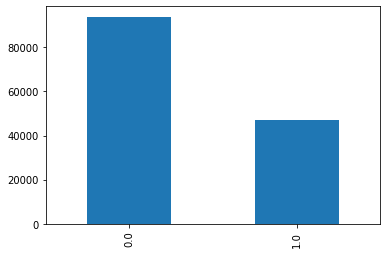

In [30]:
y_train_over.value_counts().plot(kind="bar")

In [31]:
# define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
under = RandomUnderSampler(sampling_strategy=0.75)
# fit and apply the transform
X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)

In [32]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0.0: 62476, 1.0: 46857})


In [33]:
y_train_under.value_counts()/len(y_train_under)

0.0    0.571429
1.0    0.428571
Name: label, dtype: float64

<AxesSubplot:>

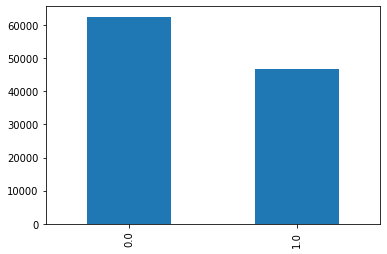

In [34]:
y_train_under.value_counts().plot(kind="bar")

In [35]:
X_train_under.head(5)

,order_1,order_2,order_3,order_6,order_7,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T
0,A,G,G,C,C,0.141507,0.126367,0.153657,0.394357,0.233690,...,0.246409,0.394191,0.228602,0.277174,0.161305,0.575243,0.2,0.666667,0.50,0.00
1,A,T,G,T,A,0.062370,0.080194,0.209788,0.271982,0.261444,...,0.198276,0.567082,0.229686,0.486413,0.098550,0.987267,0.4,0.000000,0.25,0.50
2,T,G,G,A,A,0.143803,0.080194,0.099281,0.181102,0.141981,...,0.188066,0.442600,0.172264,0.362319,0.139315,0.907086,0.4,0.000000,0.50,0.25
3,A,A,A,T,C,0.089229,0.130012,0.052798,0.175525,0.078560,...,0.165828,0.756570,0.450704,0.756341,0.160166,0.210394,0.6,0.333333,0.00,0.25
4,A,T,G,C,T,0.092487,0.040097,0.093142,0.152231,0.134184,...,0.331370,0.363762,0.234020,0.323370,0.248865,0.756564,0.2,0.333333,0.25,0.50


In [36]:
y_train_under.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [37]:
X_train_final = X_train_under.copy()
y_train_final = y_train_under.copy()

X_test_final = X_test_clean.copy()
y_test_final = y_test.copy()

In [38]:
X_train_final.to_csv('../data/X_train_final.csv', index=False)
X_test_final.to_csv('../data/X_test_final.csv', index=False)

y_train_final.to_csv('../data/y_train_final.csv', index=False)
y_test_final.to_csv('../data/y_test_final.csv', index=False)

# For Future Usage

In [40]:
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# split dataset into X y train test, based on gene_id
# input: df, split_size
# output: train df, test df
def split(df, split_size=0.2):
    splitter = GroupShuffleSplit(test_size=split_size, n_splits=1, random_state=42)
    split = splitter.split(df, groups=df['gene_id'])
    train_inds, test_inds = next(split)
    train = df.iloc[train_inds]
    test = df.iloc[test_inds]
    
    y_train = train['label']
    X_train = train.drop(['label', 'sevenmers'], axis = 1)
    y_test = test['label']
    X_test = test.drop(['label', 'sevenmers'], axis = 1)
    
    return X_train, y_train, X_test, y_test

# oversample and undersample such that ratio of minority to majority samples becomes 3:4
# input: df, df (X_train, y_train)
# output: df, df (resampled version)
def resample(X_train, y_train):
    # define oversampling strategy so that ratio of minority samples to majority samples is 1:2
    oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
    
    # define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
    under = RandomUnderSampler(sampling_strategy=0.75)
    X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)
    return X_train_under, y_train_under

df = pd.read_csv('../data/grouped_data.csv')
features_nominal = ['order_1', 'order_2', 'order_3', 'order_6', 'order_7']
df[features_nominal] = df[features_nominal].astype('category')
X_train, y_train, X_test, y_test = split(df)
X_train, y_train = resample(X_train, y_train)
X_train = X_train.drop(columns=['gene_id', 'transcript_id'])
X_test = X_test.drop(columns=['gene_id', 'transcript_id'])

# OR
# X_train = pd.read_csv('../data/X_train_final.csv')
# y_train = pd.read_csv('../data/y_train_final.csv')
# X_test = pd.read_csv('../data/X_test_final.csv')
# y_test = pd.read_csv('../data/y_test_final.csv')
# features_nominal = ['order_1', 'order_2', 'order_3', 'order_6', 'order_7']
# X_train[features_nominal] = X_train[features_nominal].astype('category')
# X_test[features_nominal] = X_test[features_nominal].astype('category')